In [1]:
import numpy as np
import imageio.v3 as iio
import skimage as ski
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.morphology import disk, opening, skeletonize, thin, closing

In [2]:
# Load the whole image
O = iio.imread(uri="../T14502Las/T14502_02-Feb-07_JewelryLog.tiff")
# Convert to grayscale
#O = ski.color.rgb2gray(O)
""" def grayscale(colors):
    #Return grayscale of given color.
    r, g, b = colors
    return 0.21 * r + 0.72 * g + 0.07 * b

result = np.apply_along_axis(grayscale, 2, O)
# Display the image
plt.imshow(O)
plt.show() """


' def grayscale(colors):\n    #Return grayscale of given color.\n    r, g, b = colors\n    return 0.21 * r + 0.72 * g + 0.07 * b\n\nresult = np.apply_along_axis(grayscale, 2, O)\n# Display the image\nplt.imshow(O)\nplt.show() '

y: 15012, x: 2550


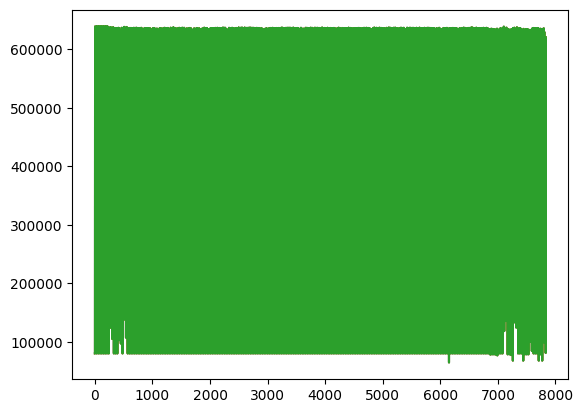

In [3]:
y, x = O.shape[:2]
print(f"y: {y}, x: {x}")
#Read each line of image until the whole line value = white, then remove all lines with that value and all prior
def horizontal_projection(line_pixels):
    return np.sum(line_pixels, axis=1) # Do the same but for other axis when segmenting graphs

tmp = horizontal_projection (O[6737:14570])

plt.plot(tmp)


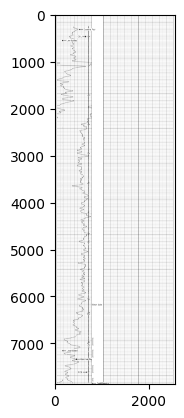

In [4]:
plt.imshow(O[6700:14570])

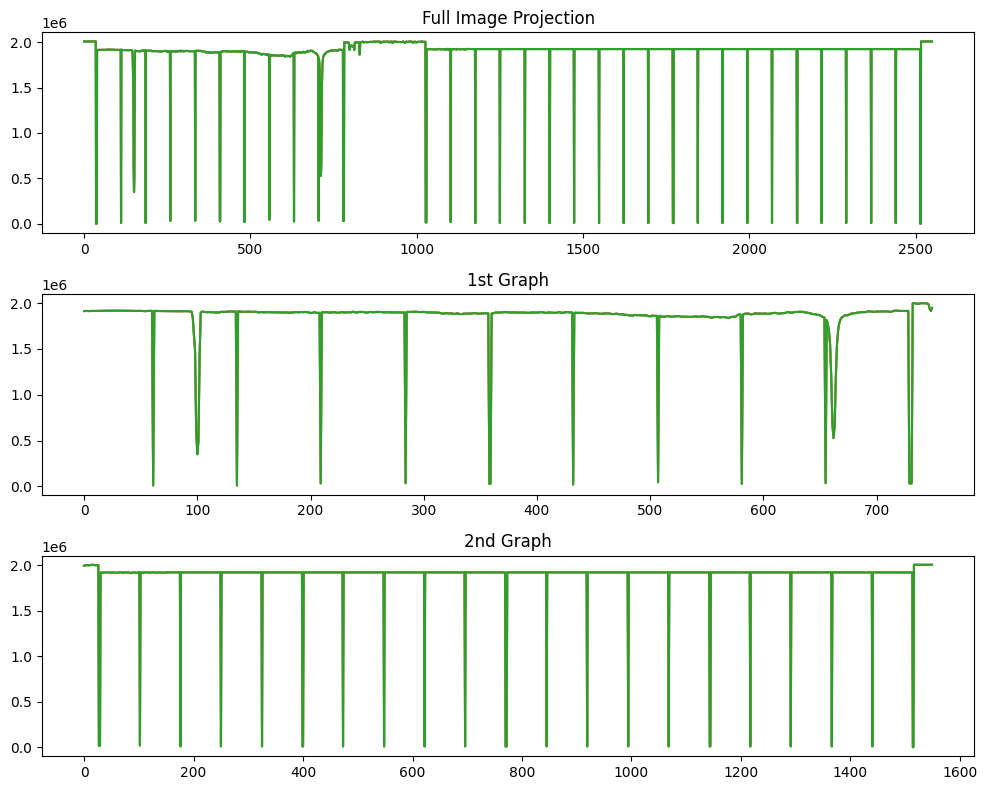

In [5]:
# Looking at the other axis to recognize the different graphs

# Save the interval without the headers
headerless_O = O[6700:14570]

def horizontal_projection(line_pixels):
    return np.sum(line_pixels, axis=0)

tmp = horizontal_projection(headerless_O)

#plt.plot(tmp)

O_graph1 = horizontal_projection(headerless_O[:, 50:800]) 
#plt.plot(O_graph1_x)

O_graph2 = horizontal_projection(headerless_O[:, 1000:]) 

# Create three separate subplots
plt.figure(figsize=(10, 8))  # Optional: specify figure size

# First subplot
plt.subplot(3, 1, 1)
plt.plot(tmp)
plt.title('Full Image Projection')

# Second subplot
plt.subplot(3, 1, 2)
plt.plot(O_graph1)
plt.title('1st Graph')

# Thirs subplot
plt.subplot(3, 1, 3)
plt.plot(O_graph2)
plt.title('2nd Graph')

# Add some spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

' temp0 = np.rot90(headerless_O[:, 50:800])\ntemp1 = np.rot90(temp0)\ntemp2 = np.rot90(temp1)\niio.imwrite("manuallycutrotated.jpg",temp2) '

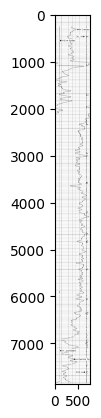

In [6]:
# 1st graph, with the curve
plt.imshow(headerless_O[:, 50:800])
""" temp0 = np.rot90(headerless_O[:, 50:800])
temp1 = np.rot90(temp0)
temp2 = np.rot90(temp1)
iio.imwrite("manuallycutrotated.jpg",temp2) """

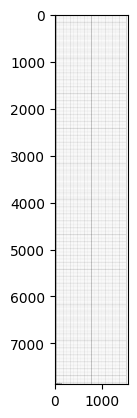

In [7]:
# 2nd graph with nothing on it, really
plt.imshow(headerless_O[:, 1000:])

In [8]:
# Cutting the graph into smaller chunks to work on
grahp1 = headerless_O[:, 50:800]

def chunkify(p_pic):
    print(p_pic.shape[0])
    threshold = 600
    chunks = []
    
    def split(p_pic):
        if p_pic.shape[0] <= threshold:
            chunks.append(p_pic)
        else:
            half = p_pic.shape[0] // 2
            split(p_pic[:half])
            split(p_pic[half:])
    
    split(p_pic)
    return chunks

graph_chunks = chunkify(grahp1)
for i in graph_chunks:
    print(i.shape)

print(len(graph_chunks))



7870
(491, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(491, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
(492, 750, 3)
16


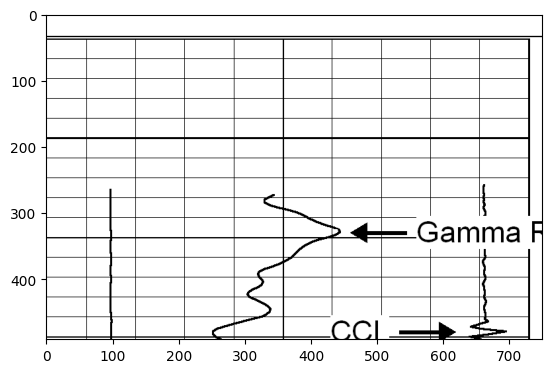

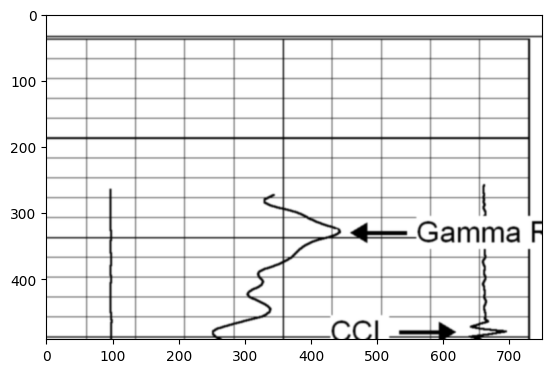

0.724609375


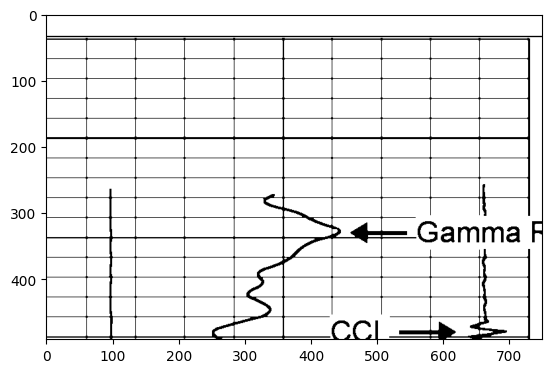

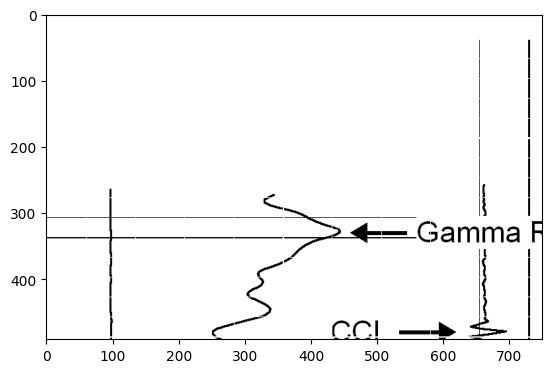

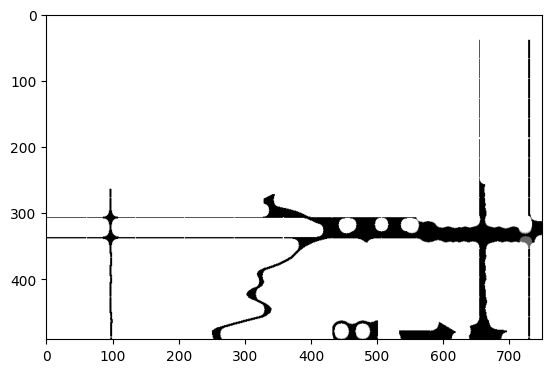

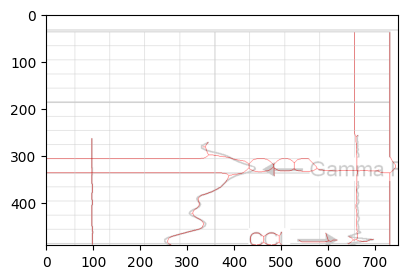

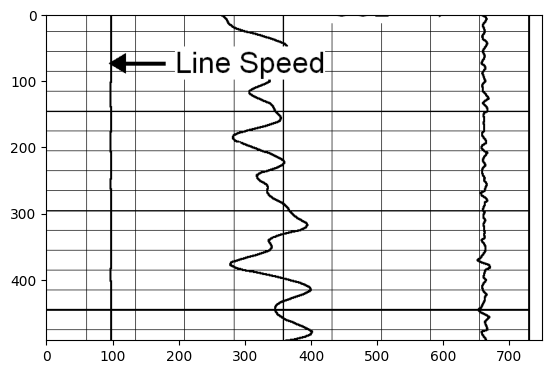

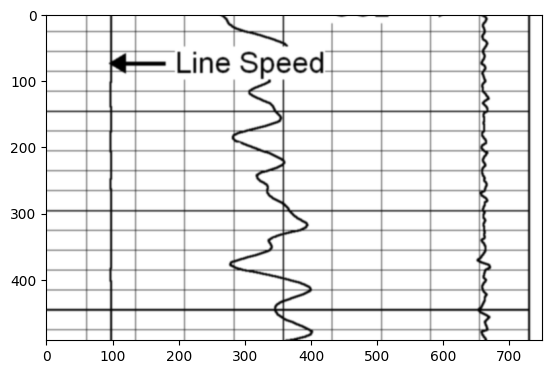

0.681640625


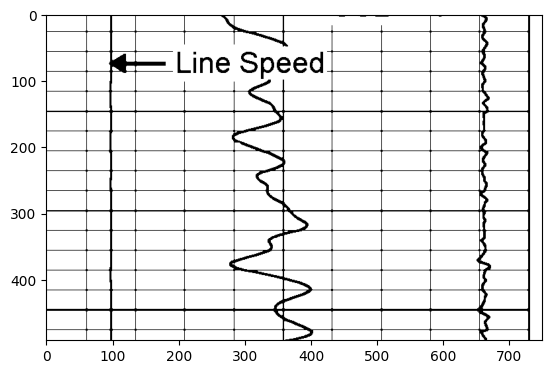

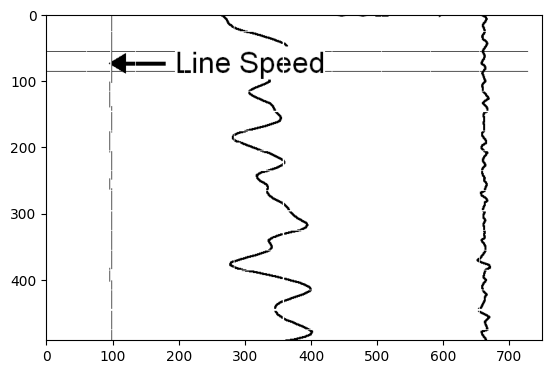

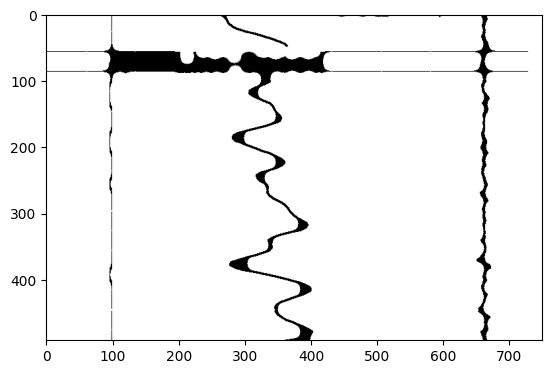

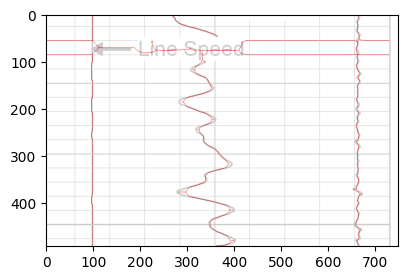

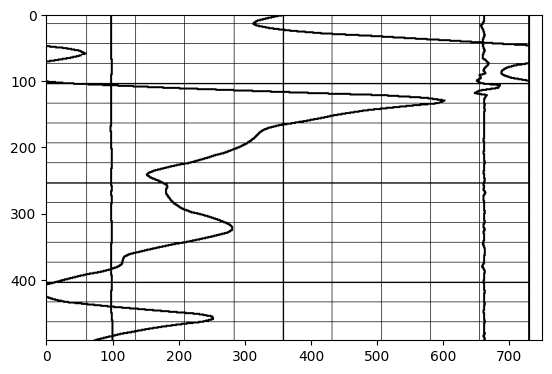

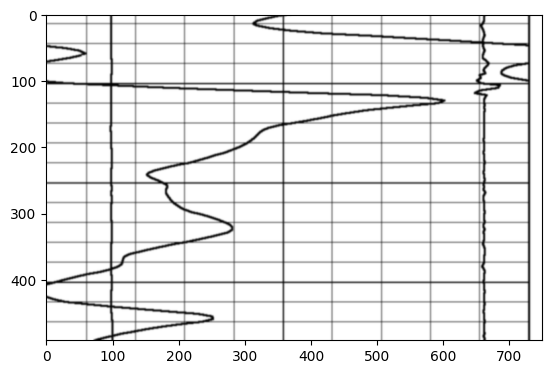

0.7249038803973111


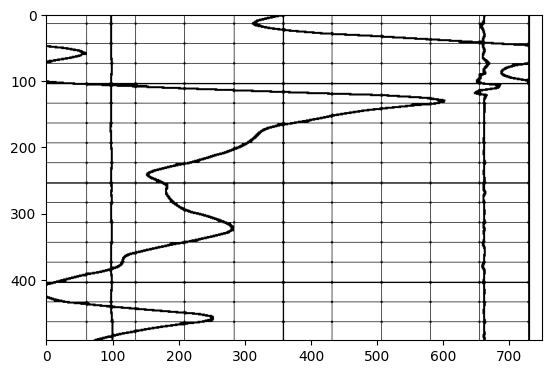

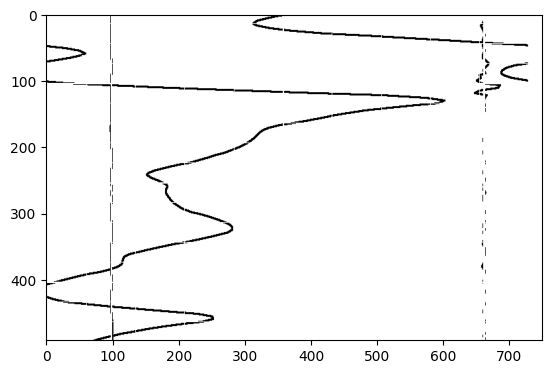

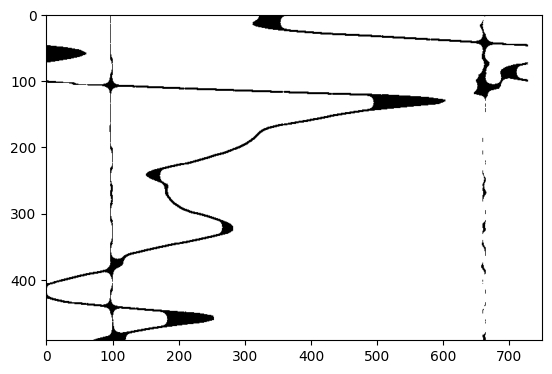

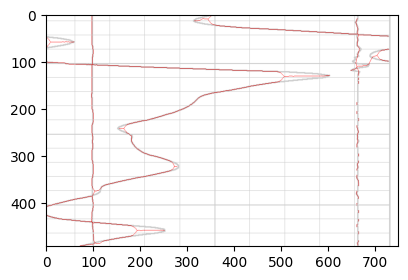

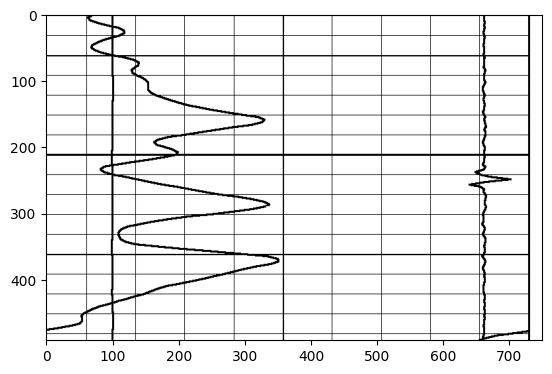

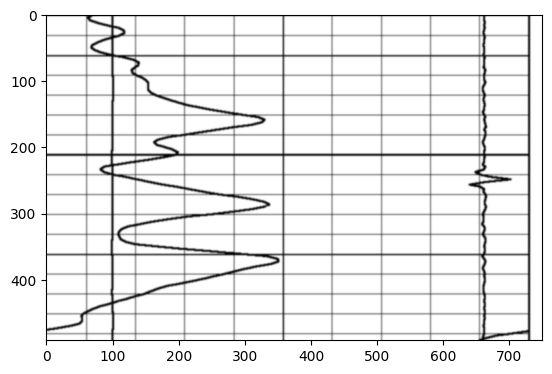

0.7800410676746568


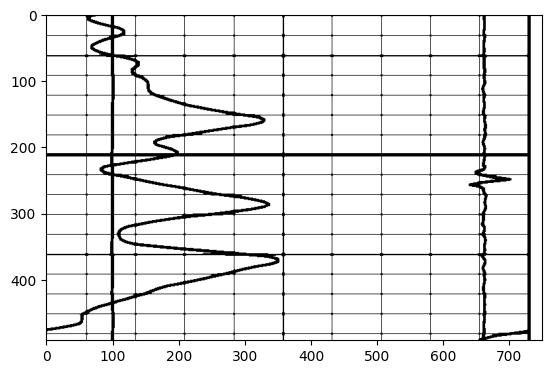

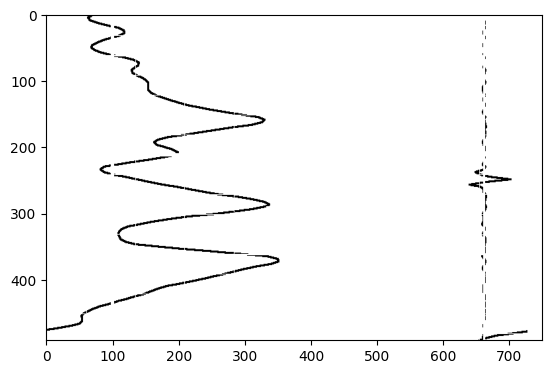

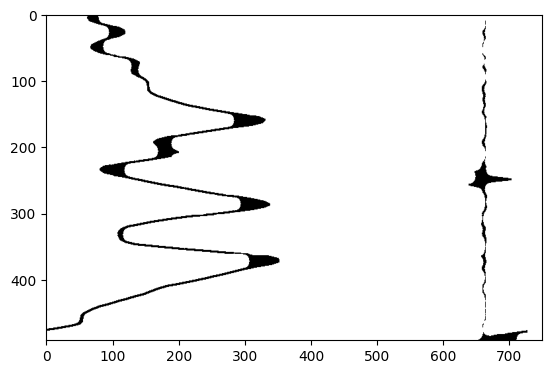

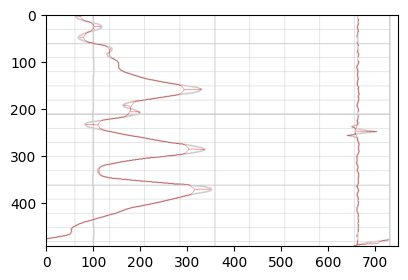

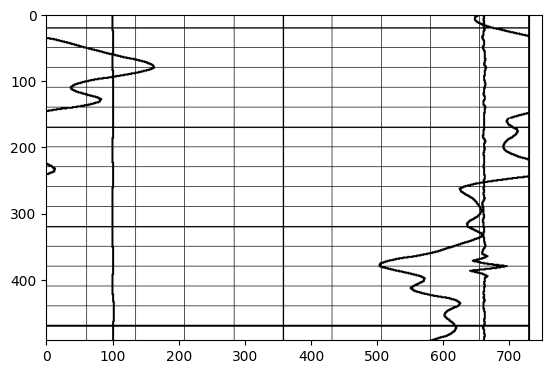

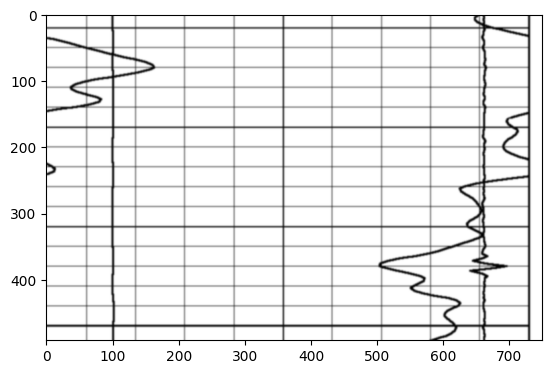

0.7286654093000291


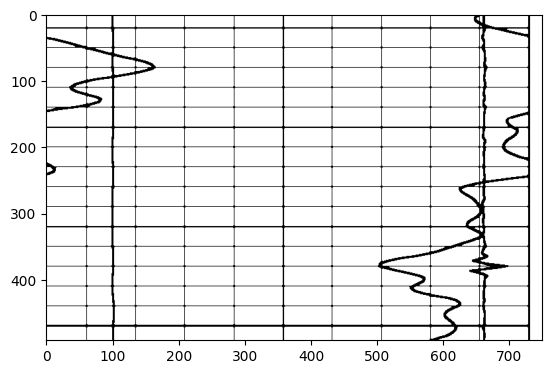

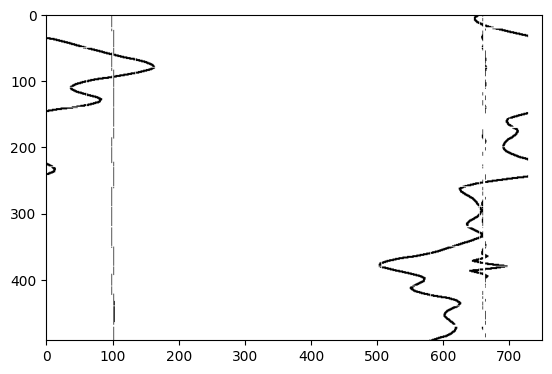

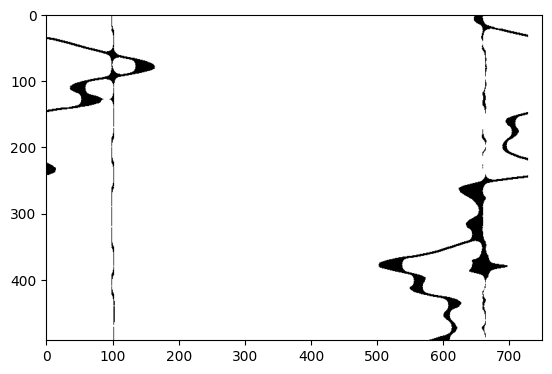

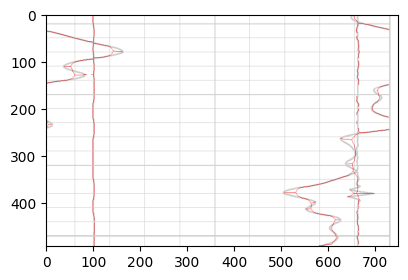

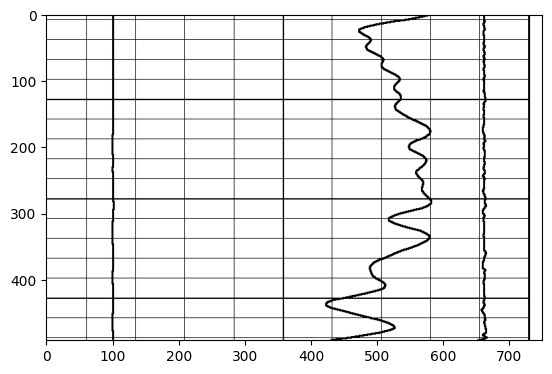

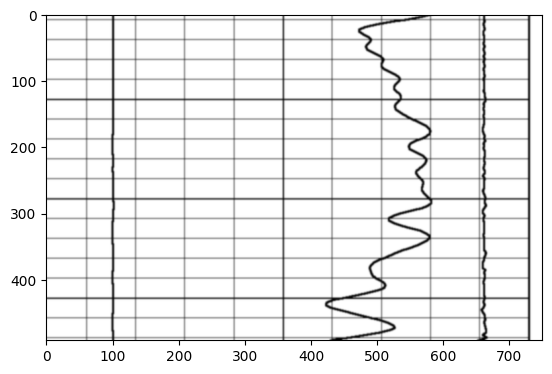

0.7949493207335636


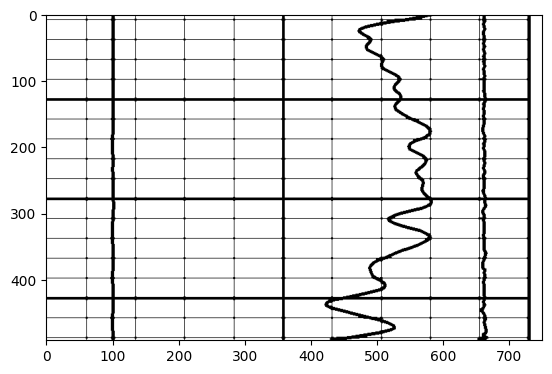

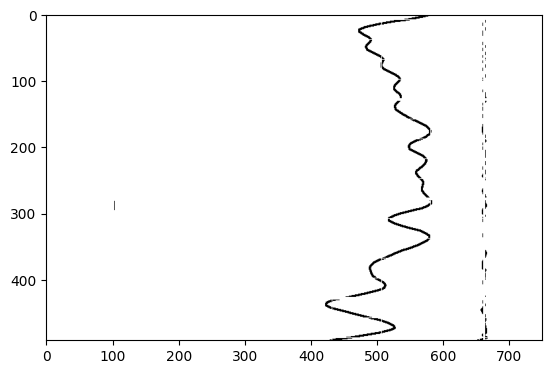

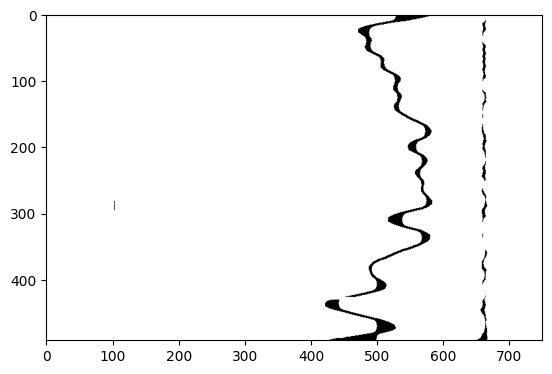

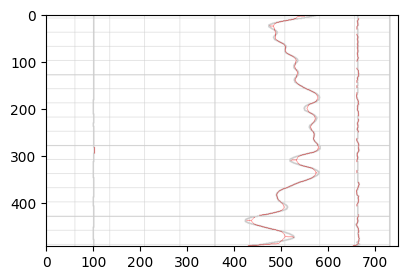

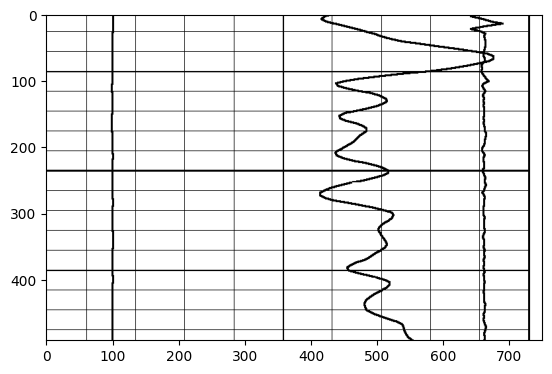

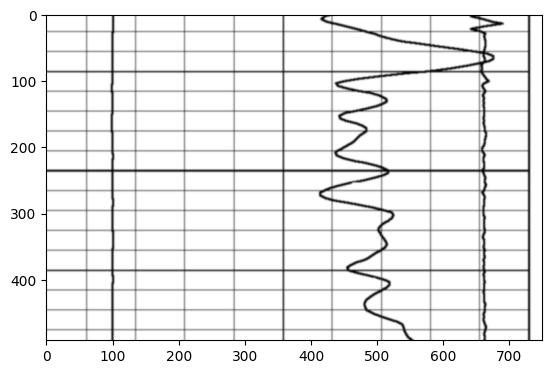

0.784177357524154


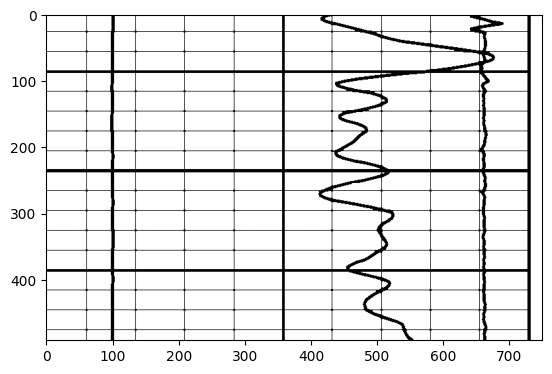

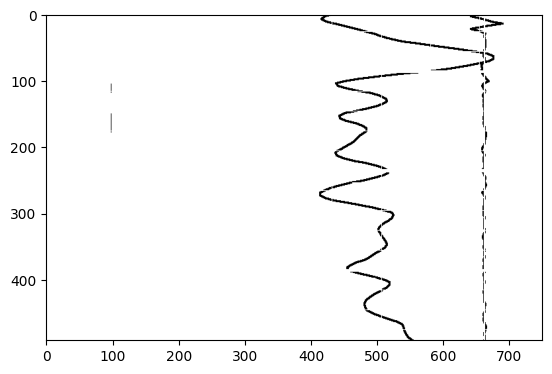

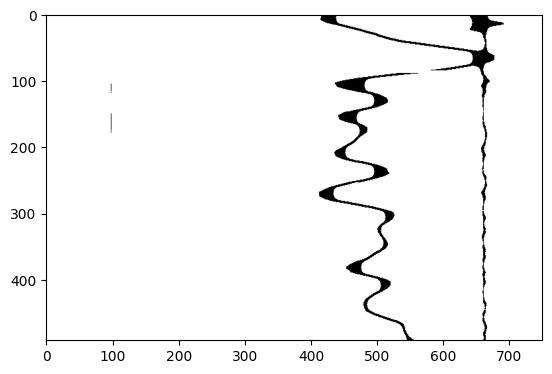

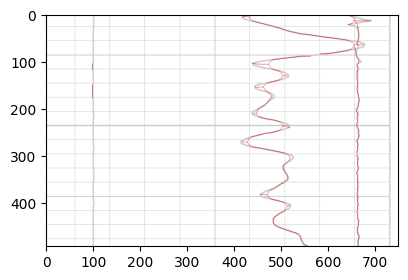

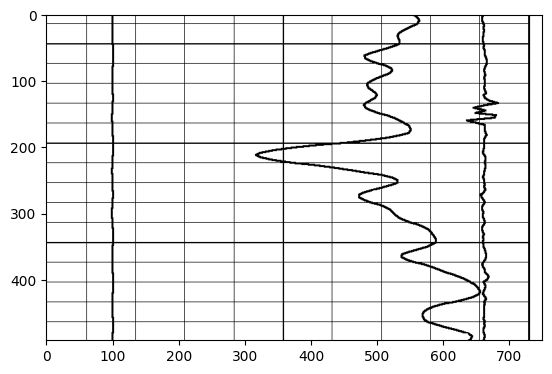

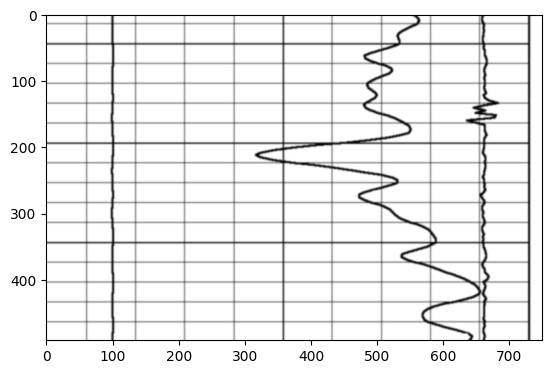

0.7872345107236469


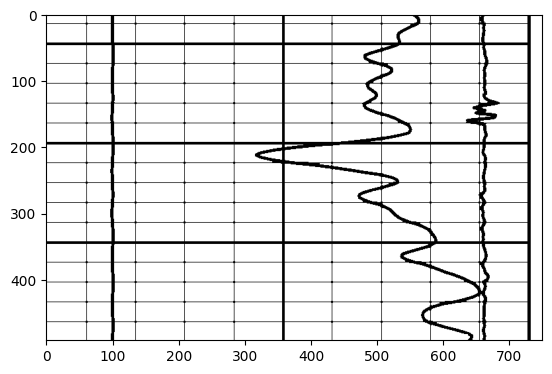

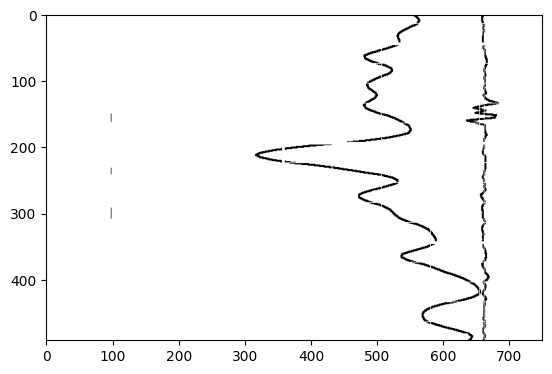

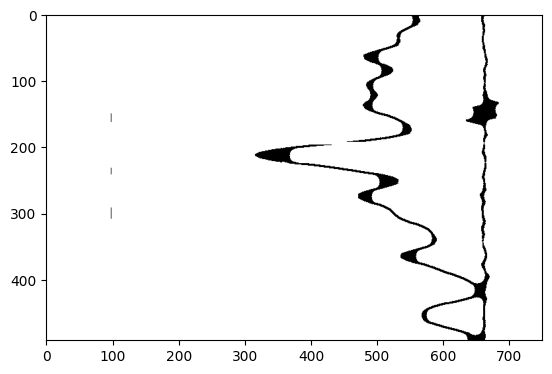

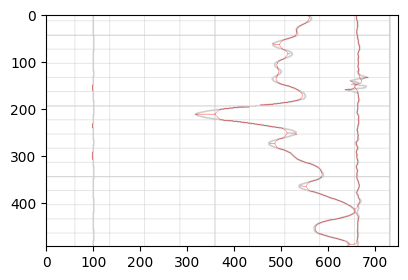

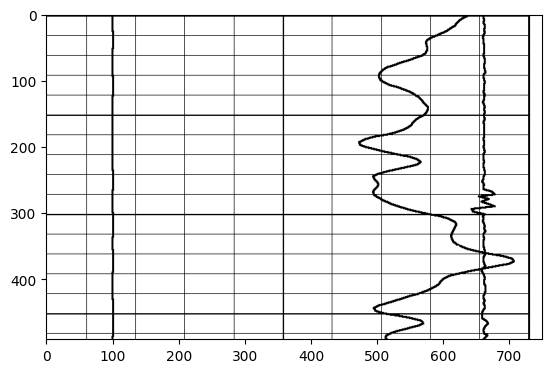

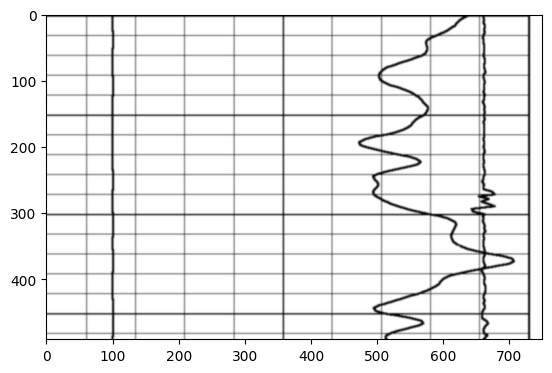

0.7871774293044997


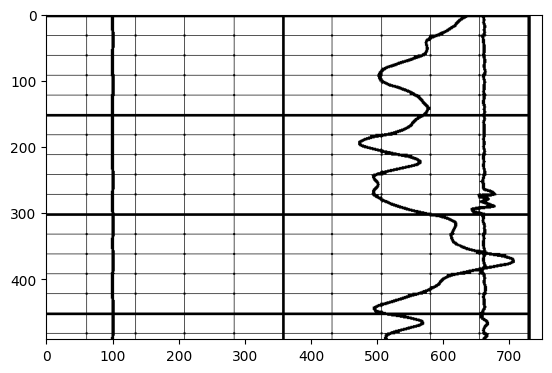

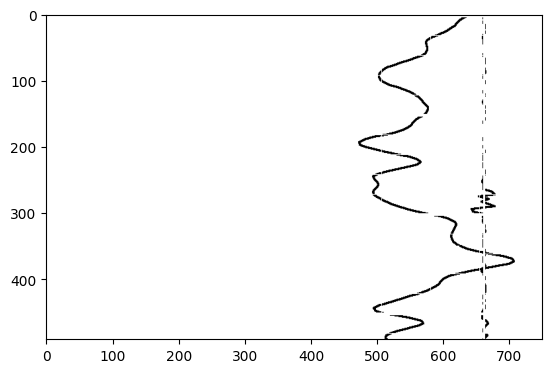

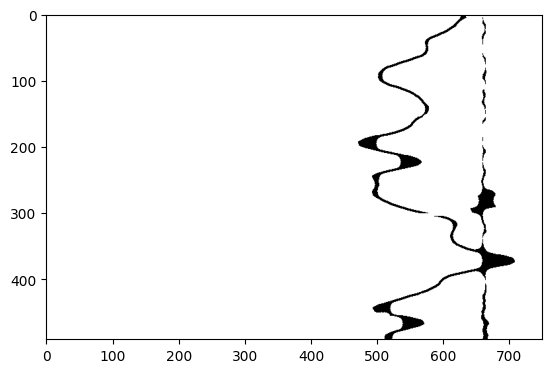

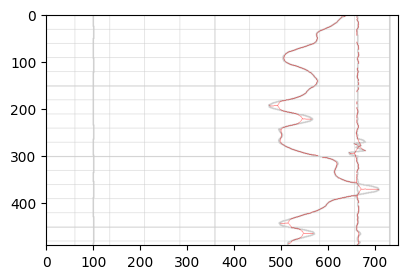

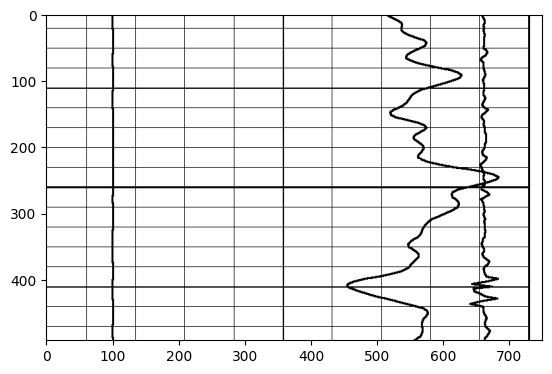

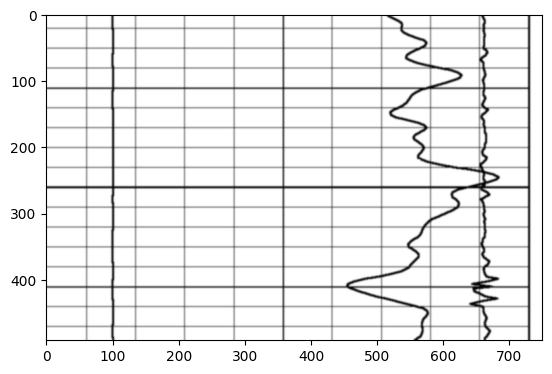

0.7871757647584499


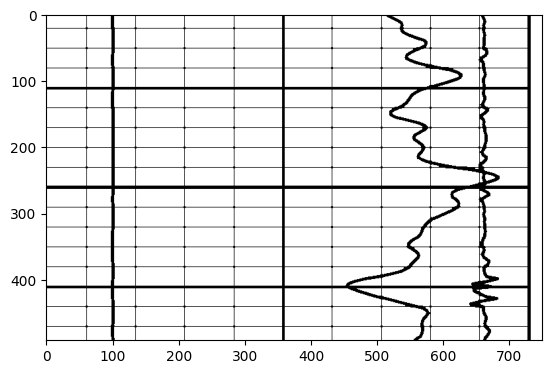

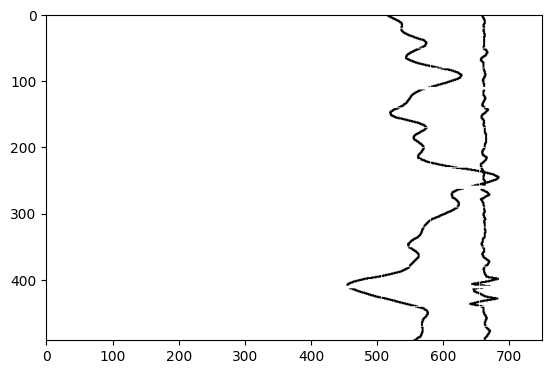

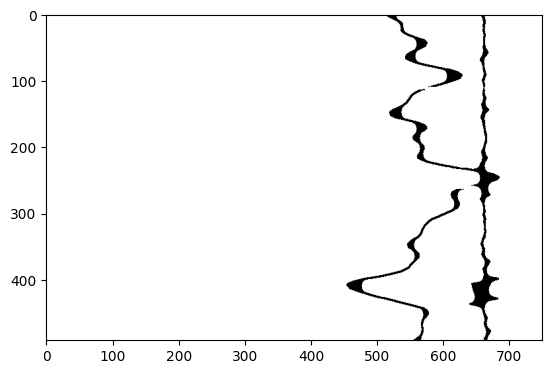

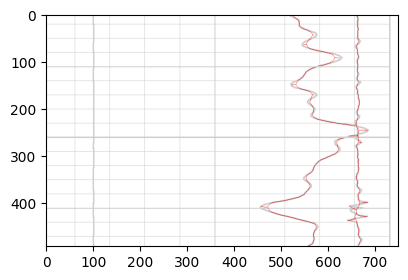

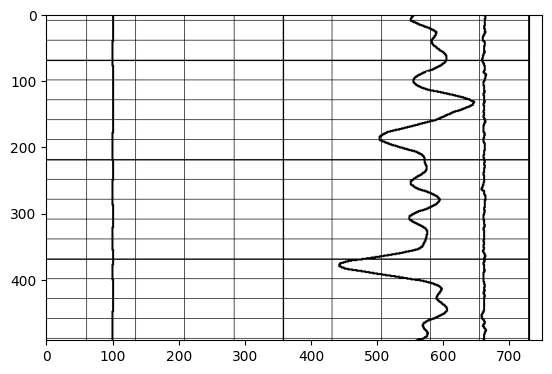

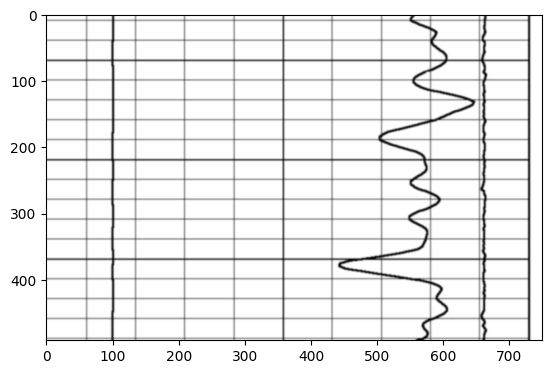

0.7958484029128592


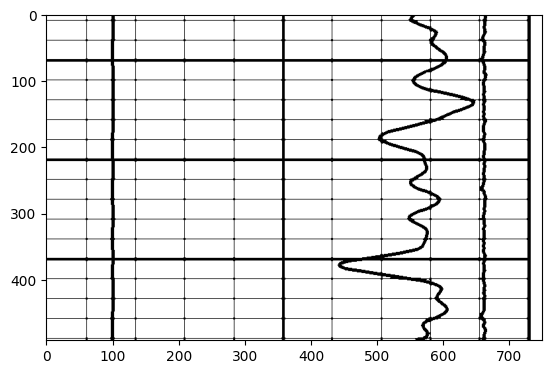

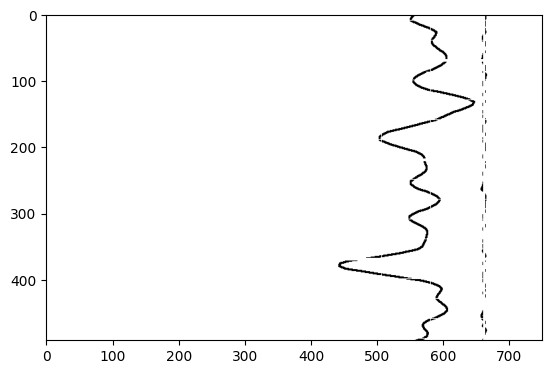

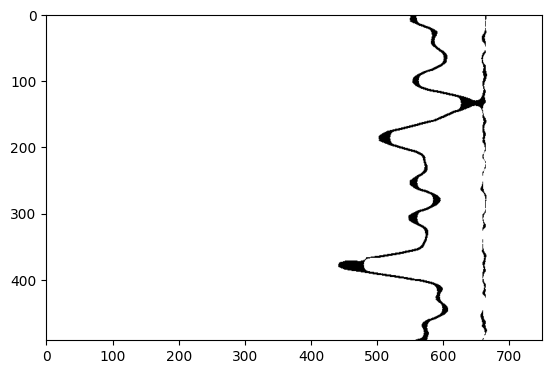

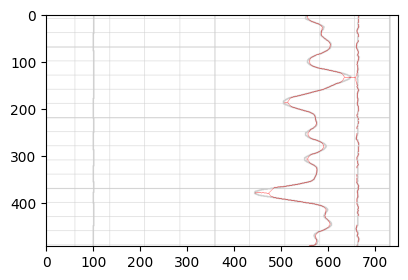

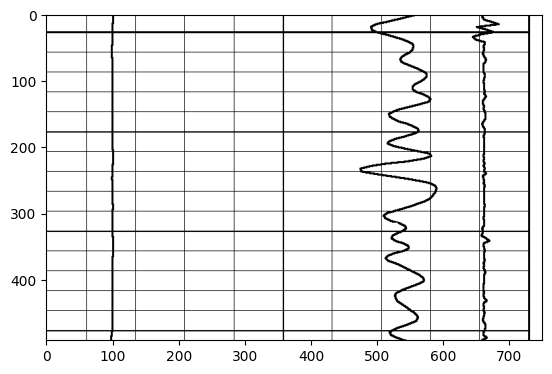

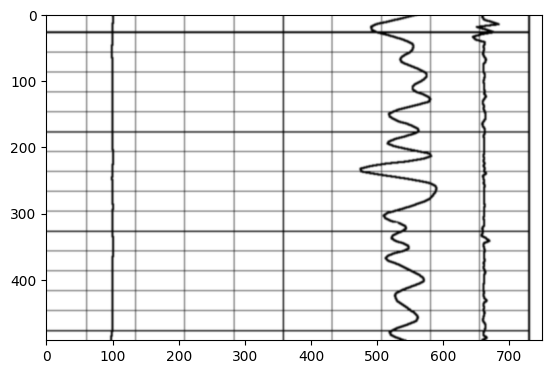

0.7755055134992777


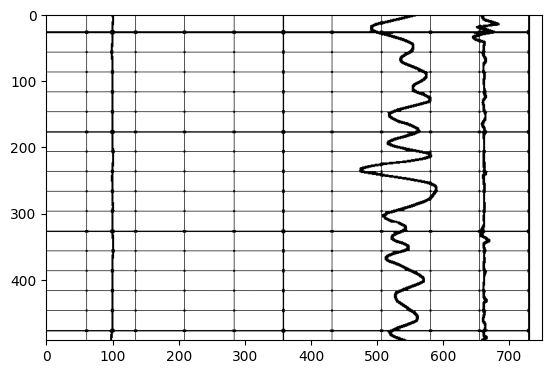

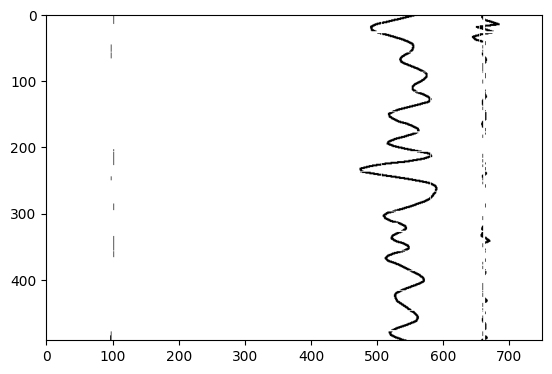

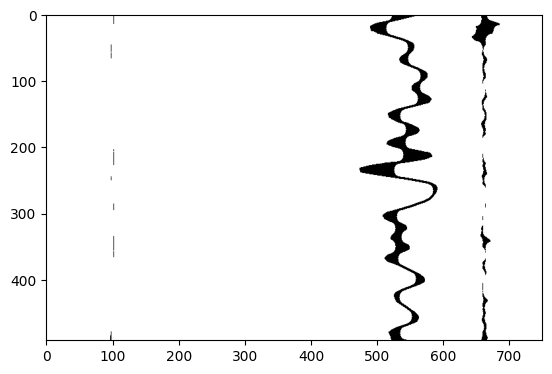

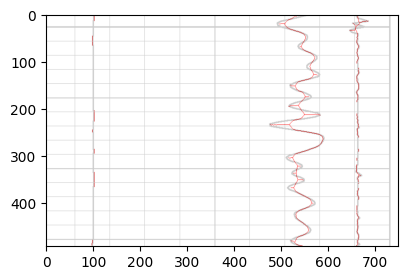

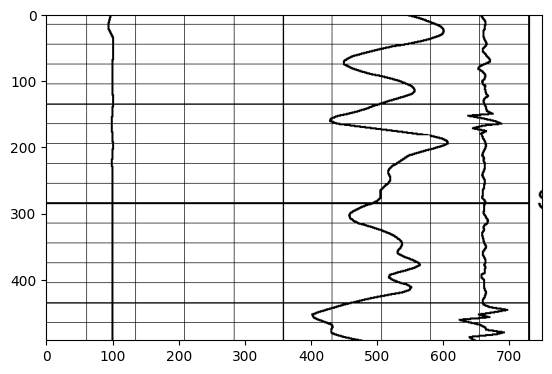

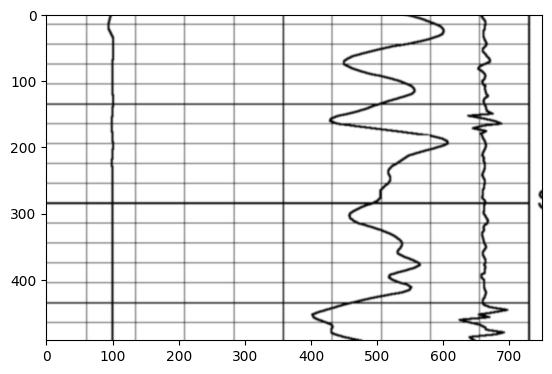

0.7247286514496195


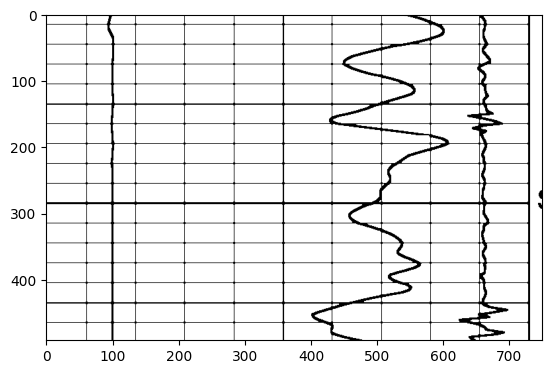

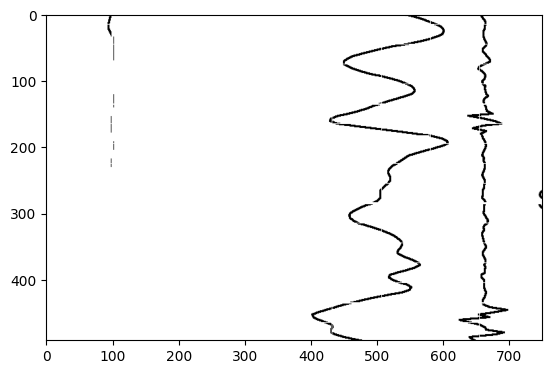

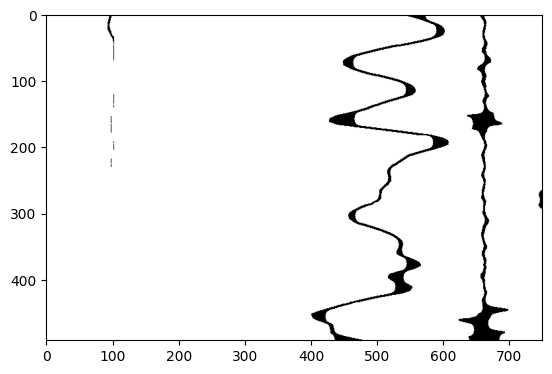

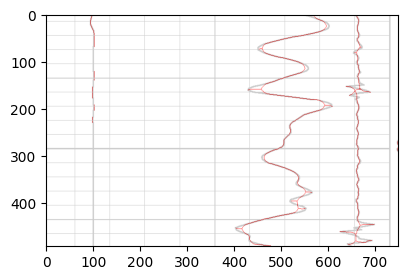

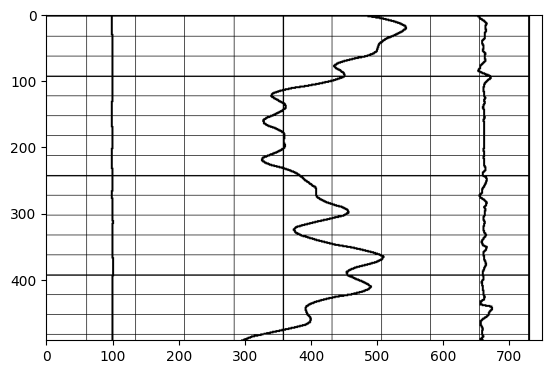

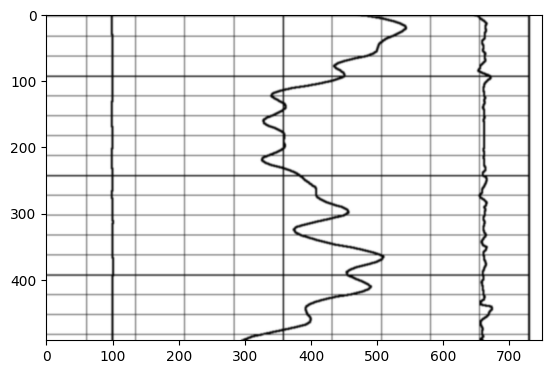

0.7910631529482128


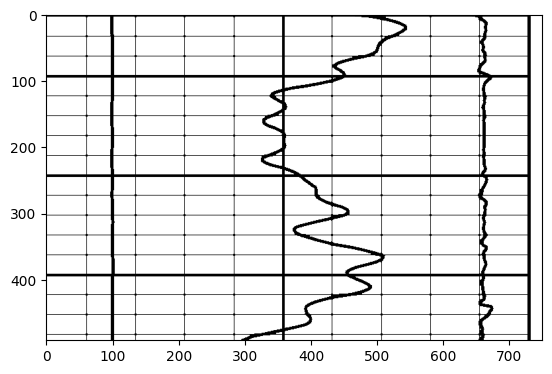

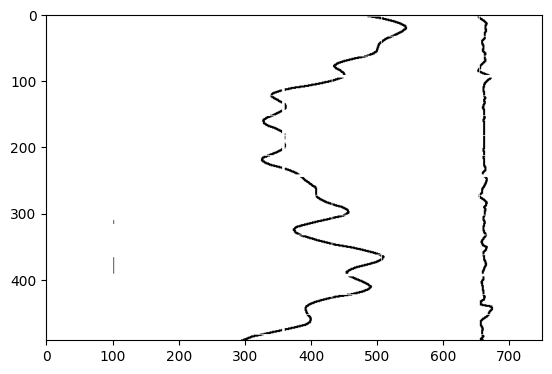

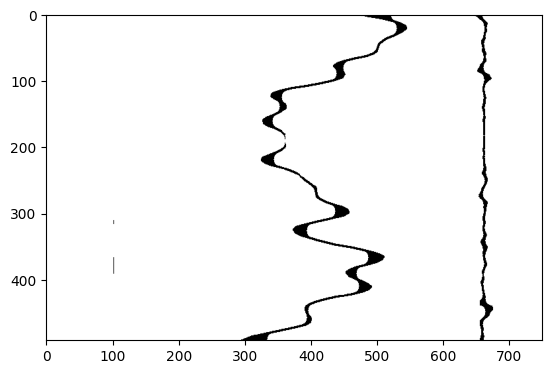

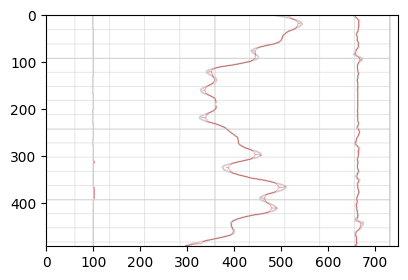

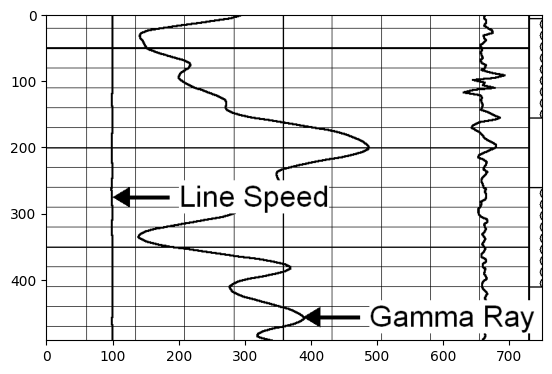

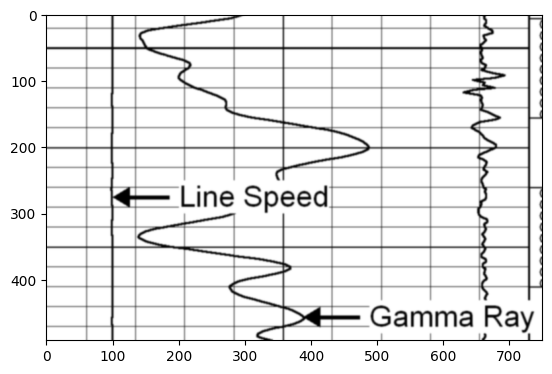

0.666015625


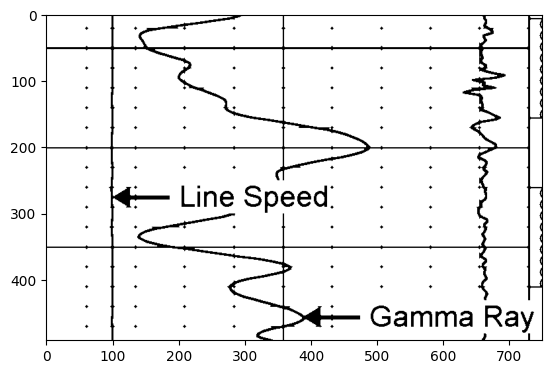

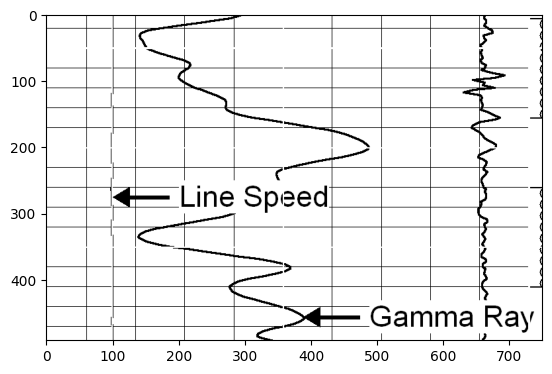

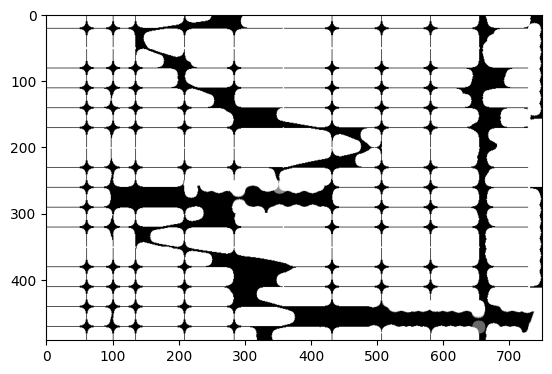

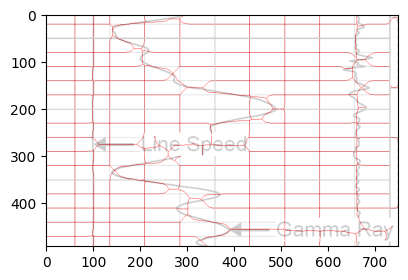

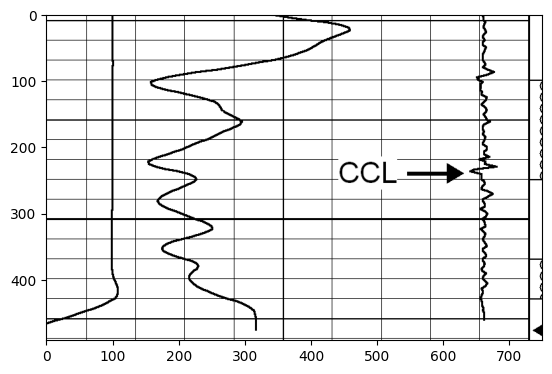

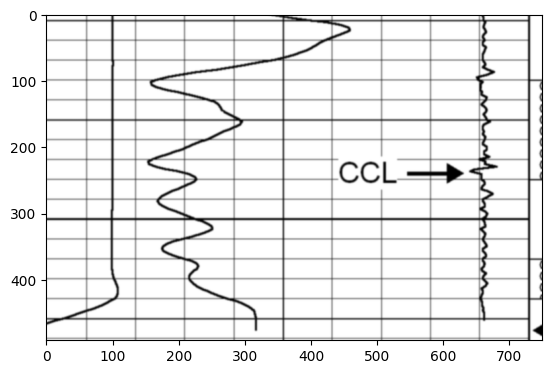

0.681640625


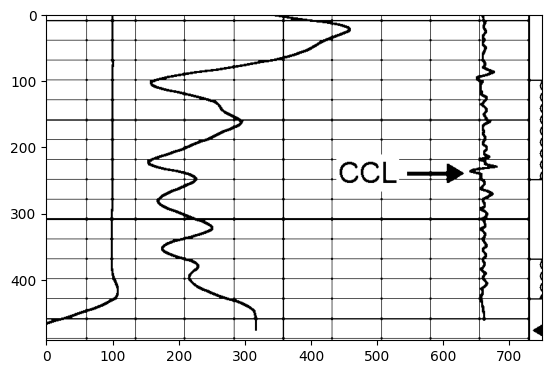

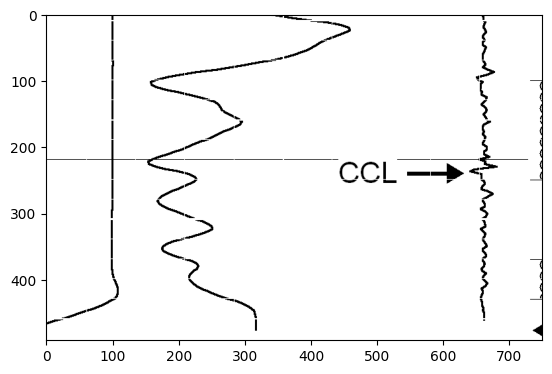

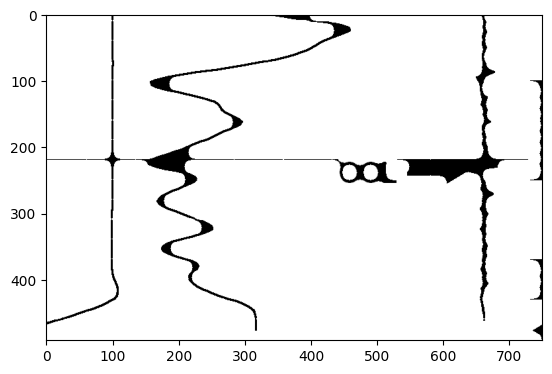

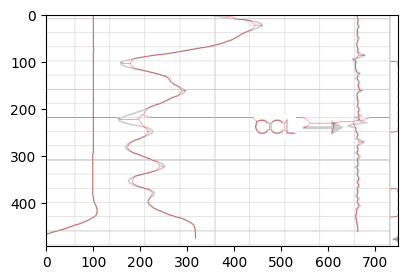

plot 1:


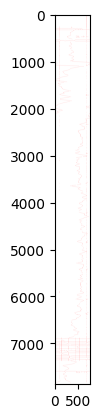

In [9]:
from numpy import shape


def process_chunks(chunk):
    array = []
    counter = 0
    for i in chunk:
        # Grayscale
        I_gray = ski.color.rgb2gray(i)
        
        plt.imshow(I_gray,cmap="gray")
        plt.show()
        I_gray = ndimage.gaussian_filter(I_gray, sigma=1)
        """ histogram, bin_edges = np.histogram(I_gray, bins=256, range=(0.0, 1.0))
        fig, ax = plt.subplots()
        ax.plot(bin_edges[0:-1], histogram)
        ax.set_title("Graylevel histogram")
        ax.set_xlabel("gray value")
        ax.set_ylabel("pixel count")
        ax.set_xlim(0, 1.0)
        plt.show() """
        plt.imshow(I_gray, cmap='gray')
        plt.show()
        # Attempt with OTSU's method
        threshold = ski.filters.threshold_otsu(I_gray)
        print(threshold)
        threshold = threshold-0.08
        
        mask = (I_gray > threshold)
        plt.imshow(mask, cmap='gray')
        plt.show()
        min_pixels = 200
        row_mask = np.sum(mask, axis=1) < int(I_gray.shape[1]*0.15)#min_pixels#
        col_mask = np.sum(mask, axis=0) < int(I_gray.shape[0]*0.15)#min_pixels+100# 
        #print(f'row mask: \n {row_mask}')
        # Add a new axis and add the maskings to that as well with np.repeat
        mask_combined = np.repeat((row_mask[:, np.newaxis] | col_mask[np.newaxis, :])[:, :, np.newaxis], i.shape[2], axis=2)
        #print(f'mask combined: \n {mask_combined}')
        K = np.maximum(i, np.max(i) * mask_combined)
        #K = (np.max(i) * mask_combined)
        plt.imshow(K)
        plt.show()
        se = disk(10)
        temp = K.mean(axis=2)
        J = opening(K.mean(axis=2),se)
        #J = (J<128)
        plt.imshow(J, cmap='gray')
        plt.show()
        S = skeletonize(J<200)
        plt.figure(figsize=(10,10))
        plt.subplot(2, 2, 4)
        overlay = np.zeros(i.shape[:2] + (3,), dtype=np.uint8) + 255
        overlay[S] = [255, 0, 0]
        if counter == 0:
            array = overlay
            counter += 1
        else:
            array = np.concatenate((array,overlay),axis=0)
        
        plt.imshow(overlay)
        plt.imshow(i, cmap="gray", alpha=0.2)
        plt.axis("image")
        plt.show()
    return array


temparray = process_chunks(graph_chunks)

fig, ax = plt.subplots()
ax.imshow(temparray)
print("plot 1:")
plt.show()
